# <center><br> Анализ данных по доходу населения UCI Adult</center>

Автор материала: Юрий Кашницкий, программист-исследователь Mail.Ru Group

**В задании предлагается с помощью Pandas ответить на несколько вопросов по данным репозитория UCI [Adult](https://archive.ics.uci.edu/ml/datasets/Adult).

Уникальные значения признаков (больше информации по ссылке выше):
- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.   
- salary: >50K,<=50K

In [146]:
from itertools import combinations
from multiprocessing.spawn import prepare

import pandas as pd
from pandas.plotting import scatter_matrix

In [147]:
data = pd.read_csv('../data/adult.data.csv')
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


**1. Сколько мужчин и женщин (признак *sex*) представлено в этом наборе данных?**

In [148]:
data_male = data[data['sex'] == 'Male'] # только мужчины
data_female = data[data['sex'] == 'Female'] # только женщины

data_female_and_male = pd.concat([data_male, data_female], ignore_index=True) # объединение этих двух массивов
print(len(data_female_and_male))

32561


**2. Каков средний возраст (признак *age*) женщин?**

In [149]:
data_female = data[data['sex'] == 'Female'] # только женщины
print(data_female['age'].sum() / len(data_female), 'years old') # сумма-возрастов-женщин / количество-женщин

36.85823043357163 years old


**3. Какова доля граждан Германии (признак *native-country*)?**

In [150]:
data_germany = data[data['native-country'] == 'Germany'] # только немцы
print(len(data_germany) / len(data) * 100, '%') # количество-немцев / всего-человек

0.42074874850281013 %


**4. Правда ли, что люди, которые получают больше 50k, имеют как минимум высшее образование? (признак *education – Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters* или *Doctorate*)**

In [151]:
data_salary = data[data['salary'] == '>50K'] # только с высокой ЗП
higher_education_vars = ['Bachelors', 'Prof-school', 'Assoc-acdm', 'Assoc-voc', 'Masters',  'Doctorate'] # вспомогательный массив
data_salary_hs = data[data['education'].isin(higher_education_vars)] # только с высокой ЗП И высшим образованием
result = len(data_salary) / len(data_salary_hs) * 100 # считаем соотношение
if result > 50: print('Да, правда.') #  делаем вывод
else: print('Нет, неправда.')

Да, правда.


**5. Какое максимальное число часов человек работает в неделю (признак *hours-per-week*)? Сколько людей работают такое количество часов и каков среди них процент зарабатывающих много?**

In [152]:
max_hours = data['hours-per-week'].max()
print(max_hours, '- максимум в hours-per-week.')
print(len(data[data['hours-per-week'] == max_hours]), '- колличество этих бедолаг')

99 - максимум в hours-per-week.
85 - колличество этих бедолаг


## <center>Практическое задание. Визуальный анализ данных по пассажирам "Титаника".

In [153]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**Считываем обучающую выборку.**

In [154]:
train_df = pd.read_csv("../data/titanic_train.csv",
                       index_col='PassengerId') 

In [155]:
train_df.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [156]:
train_df.describe(include='all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [157]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


**Выкинем признак `Cabin`, а потом – все строки, где есть пропуски.**

In [158]:
train_df = train_df.drop('Cabin', axis=1).dropna()

**Постройте попарные зависимости признаков `Age`, `Fare`, `Pclass`, `Sex`, `SibSp`, `Parch`, `Embarked` и `Survived`. (метод `scatter_matrix ` Pandas или `pairplot` Seaborn).**

C:\Windows\TEMP\ipykernel_16556\4225120200.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_df['Sex'] = train_df['Sex'].replace(list1,list1_new_param)
C:\Windows\TEMP\ipykernel_16556\4225120200.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_df['Embarked'] = train_df['Embarked'].replace(list2,list2_new_param)


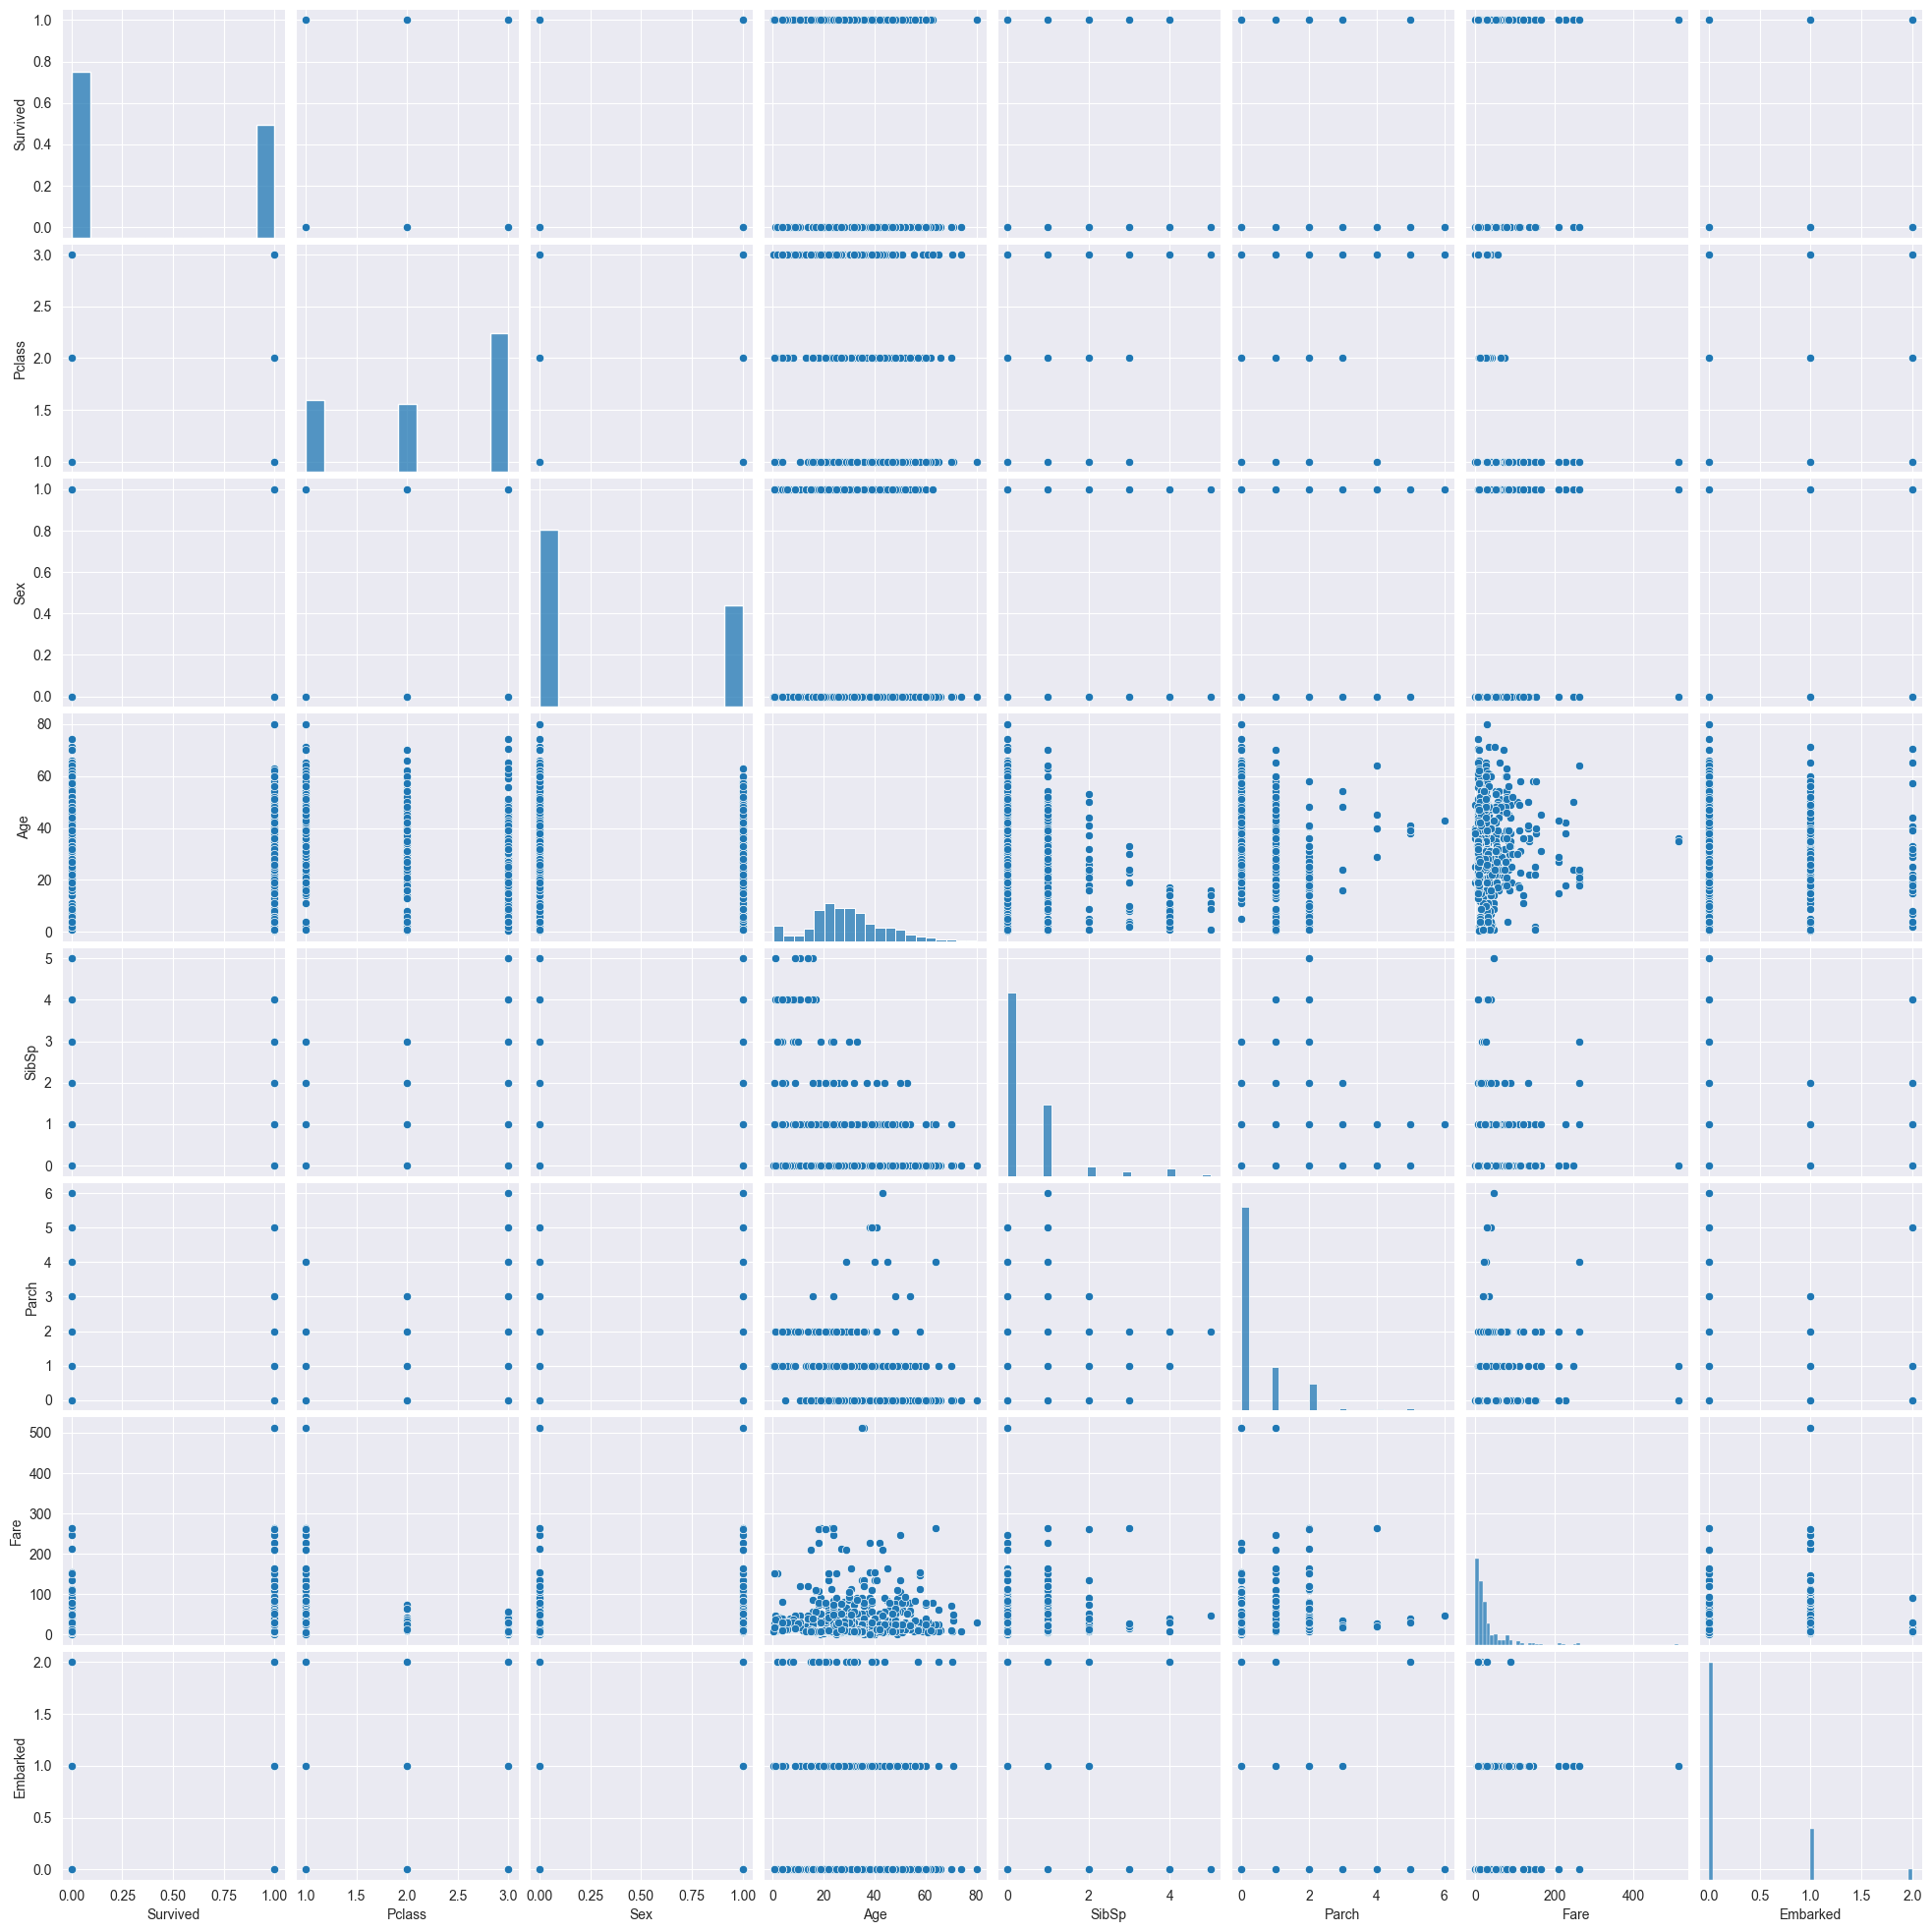

In [159]:
all_sign = ['Age', 'Fare', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Survived']

# параметры Sex и Embarked состоят из нечисловых значений поэтому данные нужно подготовить\
list1 = train_df.Sex.unique()
list1_new_param = [x for x in range(len(list1))]
list2 = train_df.Embarked.unique()
list2_new_param = [x for x in range(len(list2))]

train_df['Sex'] = train_df['Sex'].replace(list1,list1_new_param)
train_df['Embarked'] = train_df['Embarked'].replace(list2,list2_new_param)

#scatter_matrix(train_df[all_sign], figsize=(20, 20))

#for x, y in combinations(all_sign, 2):
#    scatter_matrix(train_df[[x, y]], figsize=(5, 5))
#    plt.show()

sns.pairplot(train_df, diag_kind="hist")

**Как плата за билет (`Fare`) зависит от класса каюты (`Pclass`)? Постройте boxplot.**

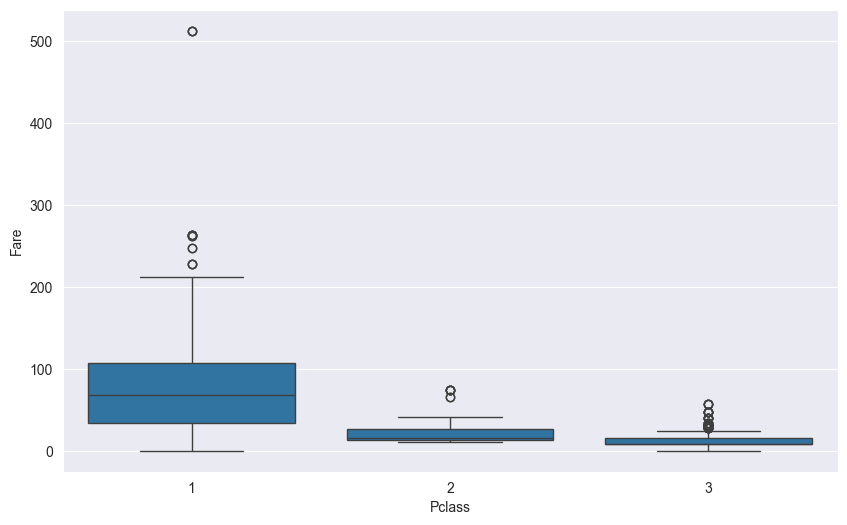

In [160]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=train_df["Pclass"], y=train_df["Fare"])
plt.show()

**Каково соотношение погибших и выживших в зависимости от пола? Отобразите c помощью Seaborn.countplot c аргументом hue.**

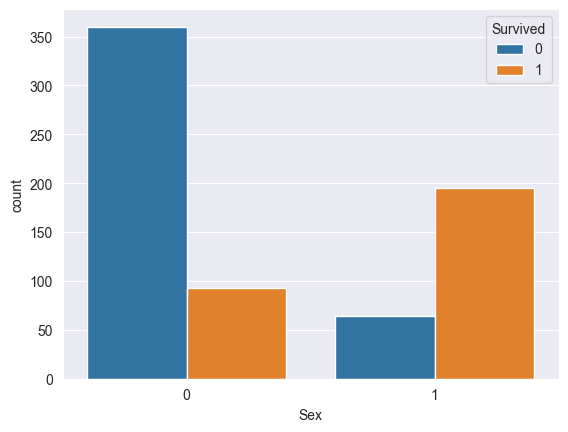

In [161]:
sns.countplot(data=train_df, x="Sex", hue="Survived")
plt.show()

**Каково соотношение погибших и выживших в зависимости от класса каюты? Отобразите c помощью Seaborn.countplot c аргументом hue.**

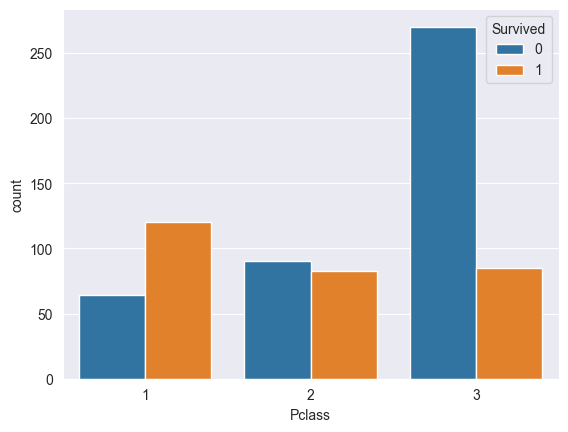

In [162]:
sns.countplot(data=train_df, x="Pclass", hue="Survived")
plt.show()

**Как факт выживания зависит от возраста пассажира? Проверьте (графически) предположение, что молодые чаще выживали. Пусть, условно, молодые - младше 30 лет, пожилые – старше 60 лет.**

             Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   
...               ...     ...   
886                 0       3   
887                 0       2   
888                 1       1   
890                 1       1   
891                 0       3   

                                                          Name  Sex  Age  \
PassengerId                                                                
1                                      Braund, Mr. Owen Harris    0  0.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...    1  1.0   
3                                       Heikkinen, Miss. Laina    1  0.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  1.0   
5                                     Allen, Mr. William Henry    0  1.0   
...                                   

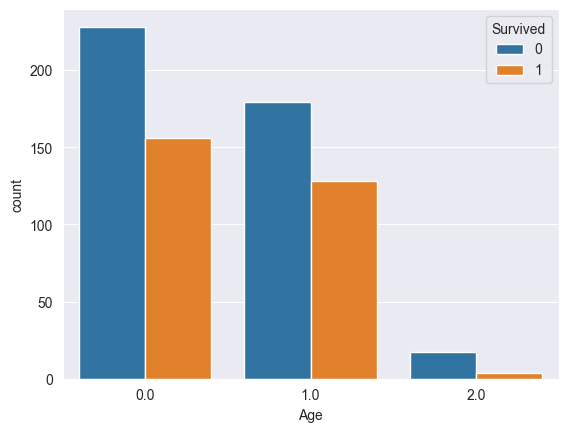

In [163]:
# подготовка
train_df.loc[train_df['Age'] < 30, 'Age'] = 0
train_df.loc[train_df['Age'] > 60, 'Age'] = 2
train_df.loc[train_df['Age'] >= 30, 'Age'] = 1

print(train_df)

sns.countplot(data=train_df, x="Age", hue="Survived")
plt.show()